#  Wellness & Lifestyle Predictor

This notebook explores how daily lifestyle factors affect sleep quality and disorders using a dataset of health metrics and personal habits.

##  Objectives
- Analyze patterns in sleep health and lifestyle attributes
- Build models to predict sleep disorders
- Gain insights from visualization and machine learning techniques

##  Tools Used
- Python, pandas, NumPy, seaborn, matplotlib
- scikit-learn (classification, evaluation)

---


#### Project Setup

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For models
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score


#### Load the Dataset

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### Data Cleaning & Exploration

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.7+ KB


In [4]:
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
df.columns


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
#Class Distribution 
df['Sleep Disorder'].value_counts()


None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

#### Class Balance Check
This plot shows how balanced the target variable (`Sleep Disorder`) is. It helps decide whether we need techniques like stratified sampling, class weights, or resampling.


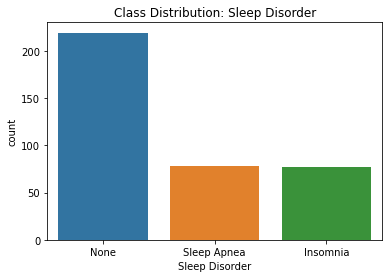

In [8]:
sns.countplot(x='Sleep Disorder', data=df)
plt.title("Class Distribution: Sleep Disorder")
plt.show()


#### Data Visualization

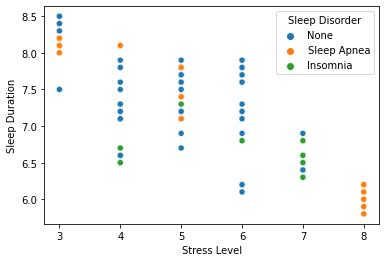

In [9]:
sns.scatterplot(data=df, x='Stress Level', y='Sleep Duration', hue='Sleep Disorder')
plt.show()

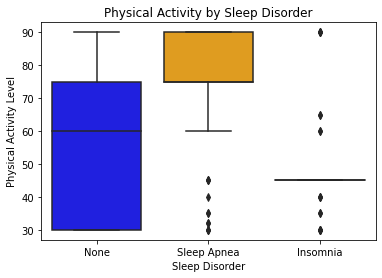

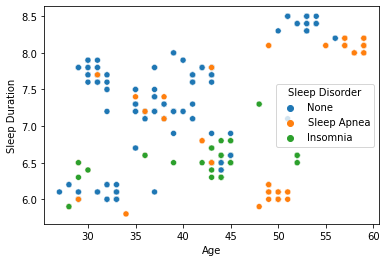

In [10]:
# Example: Stress vs Physical Activity
palette = {
    'None': 'blue',
    'Sleep Apnea': 'orange',
    'Insomnia': 'green'
}
# Plot with the custom palette
sns.boxplot(data=df, x='Sleep Disorder', y='Physical Activity Level', palette=palette)
plt.title("Physical Activity by Sleep Disorder")
plt.show()


# Example: Sleep Duration by Age Group
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Sleep Disorder')
plt.show()


In [11]:
df[df['Sleep Disorder'] == 'Insomnia']['Physical Activity Level'].describe()
#In a boxplot:
#When 25%, 50%, and 75% are the same → the box collapses into a single line

count    77.000000
mean     46.818182
std      11.751514
min      30.000000
25%      45.000000
50%      45.000000
75%      45.000000
max      90.000000
Name: Physical Activity Level, dtype: float64

Note: The boxplot for "Insomnia" seemed invisible because the 25th, 50th, and 75th percentiles were identical, collapsing the box into a line. Debugging this helped me understand the distribution better. I added a stripplot and violin plot for clearer visual insight.

(Although this isn’t directly related to model training, visual troubleshooting like this helps build data intuition — especially when class behavior is unusual.)


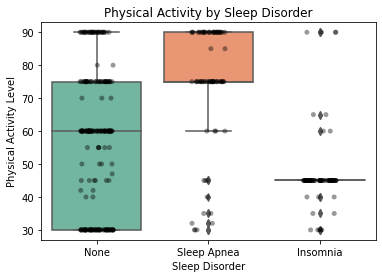

In [12]:
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df, palette='Set2')
sns.stripplot(x='Sleep Disorder', y='Physical Activity Level', data=df, color='black', alpha=0.4, jitter=0.15)
plt.title("Physical Activity by Sleep Disorder")
plt.show()


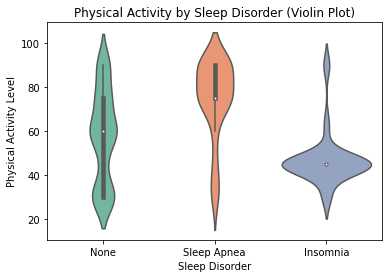

In [13]:
# since we could't observe the data distribution by box plot we switched to a violin plot.
sns.violinplot(x='Sleep Disorder', y='Physical Activity Level', data=df, palette='Set2')
plt.title("Physical Activity by Sleep Disorder (Violin Plot)")
plt.show()


#### Data Cleaning

In [14]:
#Check for duplicates 
df.duplicated().sum()


0

In [15]:
#Check for weird values
df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### Split the Data

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, stratify=df['Sleep Disorder'], test_size=0.2, random_state=42)


#### Feature Engineering

In [17]:
cols_to_drop = ['Person ID', 'Occupation']

train_set = train_set.drop(columns=cols_to_drop)
test_set = test_set.drop(columns=cols_to_drop)


Instead of dropping the Blood Pressure feature, we decided to keep and split it into systolic and diastolic values. This is because the values may hold meaningful medical signals that could be relevant for predicting sleep disorders. Including this step also demonstrates proper preprocessing of structured string data.

In [18]:
# Split Blood Pressure in train set
bp_split_train = train_set['Blood Pressure'].str.split('/', expand=True)
train_set['Systolic_BP'] = pd.to_numeric(bp_split_train[0])
train_set['Diastolic_BP'] = pd.to_numeric(bp_split_train[1])
train_set.drop('Blood Pressure', axis=1, inplace=True)

# Split Blood Pressure in test set
bp_split_test = test_set['Blood Pressure'].str.split('/', expand=True)
test_set['Systolic_BP'] = pd.to_numeric(bp_split_test[0])
test_set['Diastolic_BP'] = pd.to_numeric(bp_split_test[1])
test_set.drop('Blood Pressure', axis=1, inplace=True)


In [19]:
#Identify the categorical columns
train_set.dtypes

Gender                      object
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic_BP                  int64
Diastolic_BP                 int64
dtype: object

In [20]:
print(train_set.columns)


Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


In [21]:
#One-hot encode the features (Gender and BMI Category)
from sklearn.preprocessing import OneHotEncoder

# Define categorical feature columns
cat_features = ['Gender', 'BMI Category']

# Initialize encoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Fit on training data only
encoder.fit(train_set[cat_features])

# Transform both sets
train_encoded = encoder.transform(train_set[cat_features])
test_encoded = encoder.transform(test_set[cat_features])

# Convert to DataFrames
import pandas as pd

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(cat_features), index=train_set.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_features), index=test_set.index)

# Drop original categorical columns and concatenate encoded ones
train_set = pd.concat([train_set.drop(columns=cat_features), train_encoded_df], axis=1)
test_set = pd.concat([test_set.drop(columns=cat_features), test_encoded_df], axis=1)


In [22]:
#Label encode the target column: Sleep Disorder
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform target
train_set['Sleep_Disorder_Encoded'] = le.fit_transform(train_set['Sleep Disorder'])
test_set['Sleep_Disorder_Encoded'] = le.transform(test_set['Sleep Disorder'])



In [23]:
# Target variable
y_train = train_set['Sleep_Disorder_Encoded']
y_test = test_set['Sleep_Disorder_Encoded']

# Feature variables — drop the target and original label
X_train = train_set.drop(columns=['Sleep Disorder', 'Sleep_Disorder_Encoded'])
X_test = test_set.drop(columns=['Sleep Disorder', 'Sleep_Disorder_Encoded'])


In [24]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns (excluding the target and already encoded dummies)
num_cols = [
    'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps',
    'Systolic_BP', 'Diastolic_BP'
]

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Define your models dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    # Train
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    
    # Save figure
    filename = f'confusion_matrix_{name.replace(" ", "_").lower()}.png'
    plt.savefig(filename)
    print(f"Saved confusion matrix as {filename}")
    plt.close()



=== Logistic Regression ===
Accuracy: 0.9333
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.92      0.80      0.86        15
        None       0.98      0.98      0.98        44
 Sleep Apnea       0.83      0.94      0.88        16

    accuracy                           0.93        75
   macro avg       0.91      0.90      0.91        75
weighted avg       0.94      0.93      0.93        75

Saved confusion matrix as confusion_matrix_logistic_regression.png

=== Random Forest ===
Accuracy: 0.9600
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
        None       1.00      1.00      1.00        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75

Saved confusion matrix as confusion_mat

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set figure size (adjust depending on number of models)
fig, axes = plt.subplots(1, len(models), figsize=(5 * len(models), 4))

# Ensure axes is iterable even if there's only one model
if len(models) == 1:
    axes = [axes]

# Plot confusion matrix for each model
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    ax.set_title(f"{name}\nConfusion Matrix")

plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define parameter grids
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

# Base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

best_models = {}

# Perform GridSearchCV
for name in base_models:
    print(f"\n🔍 Tuning {name}...")
    grid_search = GridSearchCV(
        base_models[name],
        param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"✅ Best parameters for {name}: {grid_search.best_params_}")
    print(f"✅ Best cross-validation accuracy: {grid_search.best_score_:.4f}")



🔍 Tuning Logistic Regression...
✅ Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
✅ Best cross-validation accuracy: 0.8963

🔍 Tuning Random Forest...
✅ Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
✅ Best cross-validation accuracy: 0.8963

🔍 Tuning SVM...
✅ Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
✅ Best cross-validation accuracy: 0.8997



📊 Logistic Regression
Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

    Insomnia       0.92      0.80      0.86        15
        None       1.00      0.98      0.99        44
 Sleep Apnea       0.84      1.00      0.91        16

    accuracy                           0.95        75
   macro avg       0.92      0.93      0.92        75
weighted avg       0.95      0.95      0.95        75



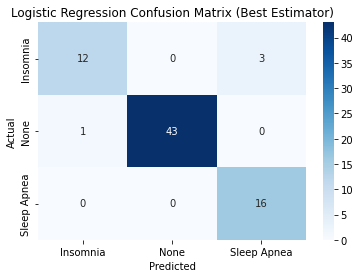


📊 Random Forest
Accuracy: 0.96
              precision    recall  f1-score   support

    Insomnia       0.93      0.87      0.90        15
        None       1.00      1.00      1.00        44
 Sleep Apnea       0.88      0.94      0.91        16

    accuracy                           0.96        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.96      0.96      0.96        75



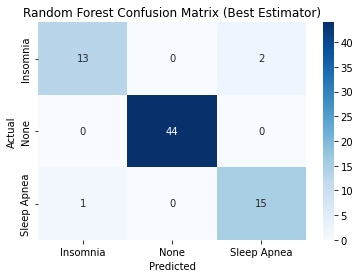


📊 SVM
Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

    Insomnia       0.87      0.87      0.87        15
        None       1.00      1.00      1.00        44
 Sleep Apnea       0.88      0.88      0.88        16

    accuracy                           0.95        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.95      0.95      0.95        75



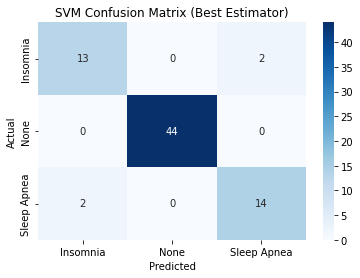

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 {name}")
    print("Accuracy:", model.score(X_test, y_test))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'{name} Confusion Matrix (Best Estimator)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
